In [1]:
import os

# Walk through  directory and list number of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/imagesoasis/Data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in '/kaggle/input/imagesoasis/Data'.
There are 0 directories and 67222 images in '/kaggle/input/imagesoasis/Data/Non Demented'.
There are 0 directories and 13725 images in '/kaggle/input/imagesoasis/Data/Very mild Dementia'.
There are 0 directories and 488 images in '/kaggle/input/imagesoasis/Data/Moderate Dementia'.
There are 0 directories and 5002 images in '/kaggle/input/imagesoasis/Data/Mild Dementia'.


In [2]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder

In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/kaggle/input/imagesoasis/Data") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Mild Dementia' 'Moderate Dementia' 'Non Demented' 'Very mild Dementia']


In [4]:
class_labels = ['Mild Dementia','Moderate Dementia','Non Demented','Very mild Dementia']

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (248, 496, 3)


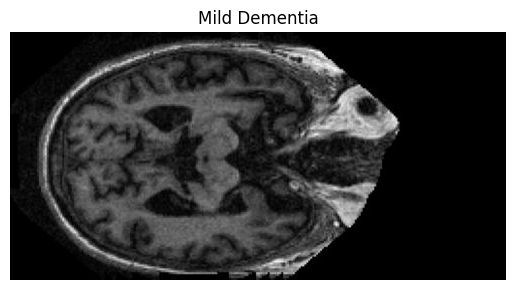

In [6]:
img = view_random_image(target_dir="/kaggle/input/imagesoasis/Data/",
                        target_class="Mild Dementia")

In [7]:
import os
import random

def collect_image_paths(directory):
    paths = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))
    return paths

# Collect image paths
path1 = collect_image_paths('/kaggle/input/imagesoasis/Data/Non Demented')
path2 = collect_image_paths('/kaggle/input/imagesoasis/Data/Mild Dementia')
path3 = collect_image_paths('/kaggle/input/imagesoasis/Data/Moderate Dementia')
path4 = collect_image_paths('/kaggle/input/imagesoasis/Data/Very mild Dementia')

# Set the size of the sample
size = 400  # You can change this value as needed

# Set seed for reproducibility
random.seed(42)

# Sample random paths
sample_path1 = random.sample(path1, min(size, len(path1)))
sample_path2 = random.sample(path2, min(size, len(path2)))
sample_path3 = random.sample(path3, min(size, len(path3)))
sample_path4 = random.sample(path4, min(size, len(path4)))

# Output the sample sizes
print(f'Sampled {len(sample_path1)} paths from Non Demented')
print(f'Sampled {len(sample_path2)} paths from Mild Dementia')
print(f'Sampled {len(sample_path3)} paths from Moderate Dementia')
print(f'Sampled {len(sample_path4)} paths from Very mild Dementia')

Sampled 400 paths from Non Demented
Sampled 400 paths from Mild Dementia
Sampled 400 paths from Moderate Dementia
Sampled 400 paths from Very mild Dementia


In [8]:
# Initialize the encoder
encoder = OneHotEncoder()

# Fit the encoder on your categorical data
encoder.fit([[0], [1], [2], [3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [9]:
data = []
result = []
for path in sample_path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in sample_path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in sample_path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in sample_path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [10]:
data = np.array(data)
data.shape

(1600, 128, 128, 3)

In [11]:
result = np.array(result)
result = result.reshape((1600,4))
result.shape



(1600, 4)

In [12]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.15,shuffle=True,random_state=42)

In [14]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,586,628 (128.12 MB)

 Trainable params: 33,586,436 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [15]:
y_train.shape  

(1360, 4)

In [16]:
x_train.shape

(1360, 128, 128, 3)

In [17]:
history = model.fit(x_train,y_train,epochs=15,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/15


I0000 00:00:1736339625.659096      71 service.cc:145] XLA service 0x7c7678003e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736339625.659147      71 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 18/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3039 - loss: 32.4273

I0000 00:00:1736339631.880997      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4336 - loss: 14.3938 - val_accuracy: 0.6042 - val_loss: 1.0700
Epoch 2/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6656 - loss: 0.8652 - val_accuracy: 0.6375 - val_loss: 0.8323
Epoch 3/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7214 - loss: 0.7074 - val_accuracy: 0.6833 - val_loss: 0.7870
Epoch 4/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7455 - loss: 0.5979 - val_accuracy: 0.7167 - val_loss: 0.6308
Epoch 5/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8106 - loss: 0.4718 - val_accuracy: 0.7625 - val_loss: 0.5535
Epoch 6/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8407 - loss: 0.4186 - val_accuracy: 0.8250 - val_loss: 0.4372
Epoch 7/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8684 - loss: 0.3273 - val_accuracy: 0.7833 - val_loss: 0.4986
Epoch 8/15
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8843 - loss: 0.2730 - val_accuracy: 0.8

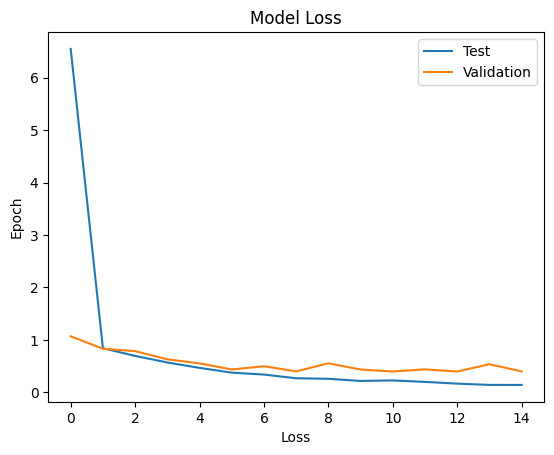

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()


In [19]:
import os
print(os.listdir('/kaggle/working/'))


# Save the model
model.save("/kaggle/working/dementia_classification_model.h5")
print("Model saved as 'dementia_classification_model.h5'")


['__notebook__.ipynb']
Model saved as 'dementia_classification_model.h5'


In [20]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'
# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia    

In [21]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on the test set
y_pred_probs = model.predict(x_test)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class indices
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoding to class indices

# Generate classification report
class_labels = ['Non Demented', 'Mild Dementia', 'Moderate Dementia', 'Very Mild Dementia']
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
Classification Report:
                     precision    recall  f1-score   support

      Non Demented       0.75      0.88      0.81        72
     Mild Dementia       1.00      0.82      0.90        62
 Moderate Dementia       1.00      1.00      1.00        57
Very Mild Dementia       0.75      0.73      0.74        49

          accuracy                           0.86       240
         macro avg       0.88      0.86      0.86       240
      weighted avg       0.87      0.86      0.86       240



99.99992847442627% Confidence This Is Moderate Dementia


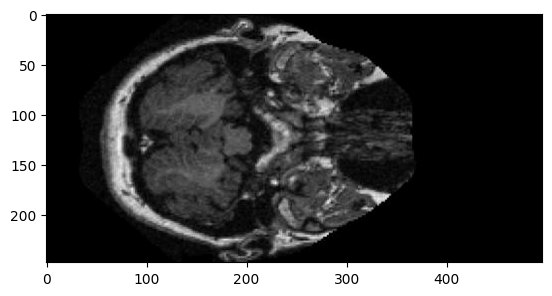

In [22]:
from matplotlib.pyplot import imshow
img = Image.open(r'/kaggle/input/imagesoasis/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_101.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

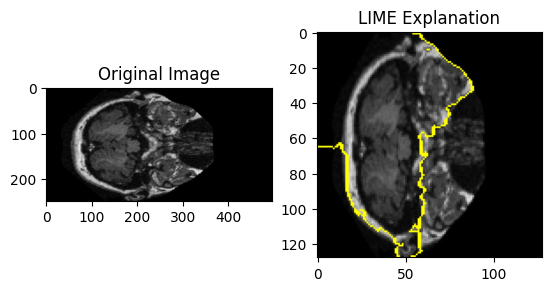

100.00% Confidence This Is Non Demented


In [23]:
import numpy as np
from lime import lime_image
from matplotlib import pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model
from skimage.segmentation import mark_boundaries

# Load your image
img_path = r'/kaggle/input/imagesoasis/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_101.jpg'
img = Image.open(img_path)
x = np.array(img.resize((128, 128)))
x = x.reshape(1, 128, 128, 3)

# Load your model
model = load_model('/kaggle/working/dementia_classification_model.h5')

# Predict the classification
res = model.predict_on_batch(x)
classification = np.argmax(res)

# Define the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a function to interpret the model's predictions
def model_predict(images):
    images = np.array(images).reshape(-1, 128, 128, 3)
    return model.predict(images)

# Explain the image
explanation = explainer.explain_instance(
    image=x[0], 
    classifier_fn=model_predict, 
    top_labels=5, 
    hide_color=0, 
    num_samples=1000  # Number of perturbations
)

# Visualize the explanation for the predicted class
temp, mask = explanation.get_image_and_mask(
    label=classification, 
    positive_only=True, 
    num_features=10, 
    hide_rest=False
)

# Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
imshow(img)

# Plot the explanation
plt.subplot(1, 2, 2)
plt.title("LIME Explanation")
plt.imshow(mark_boundaries(temp, mask))
plt.show()

# Print the confidence
class_labels = ['Mild Dementia','Moderate Dementia','Non Demented','Very mild Dementia'] # Replace with your actual class names
print(f"{res[0][classification]*100:.2f}% Confidence This Is {class_labels[classification]}")
